In [2]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
dataload = pd.read_csv('energydata_complete.csv')

In [4]:
dataload.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
dataload.shape

(19735, 29)

In [6]:
dataload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
dataload.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
dataload.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [10]:
# univarate:

dataVisual = dataload.drop(['date', 'lights'], axis=1)

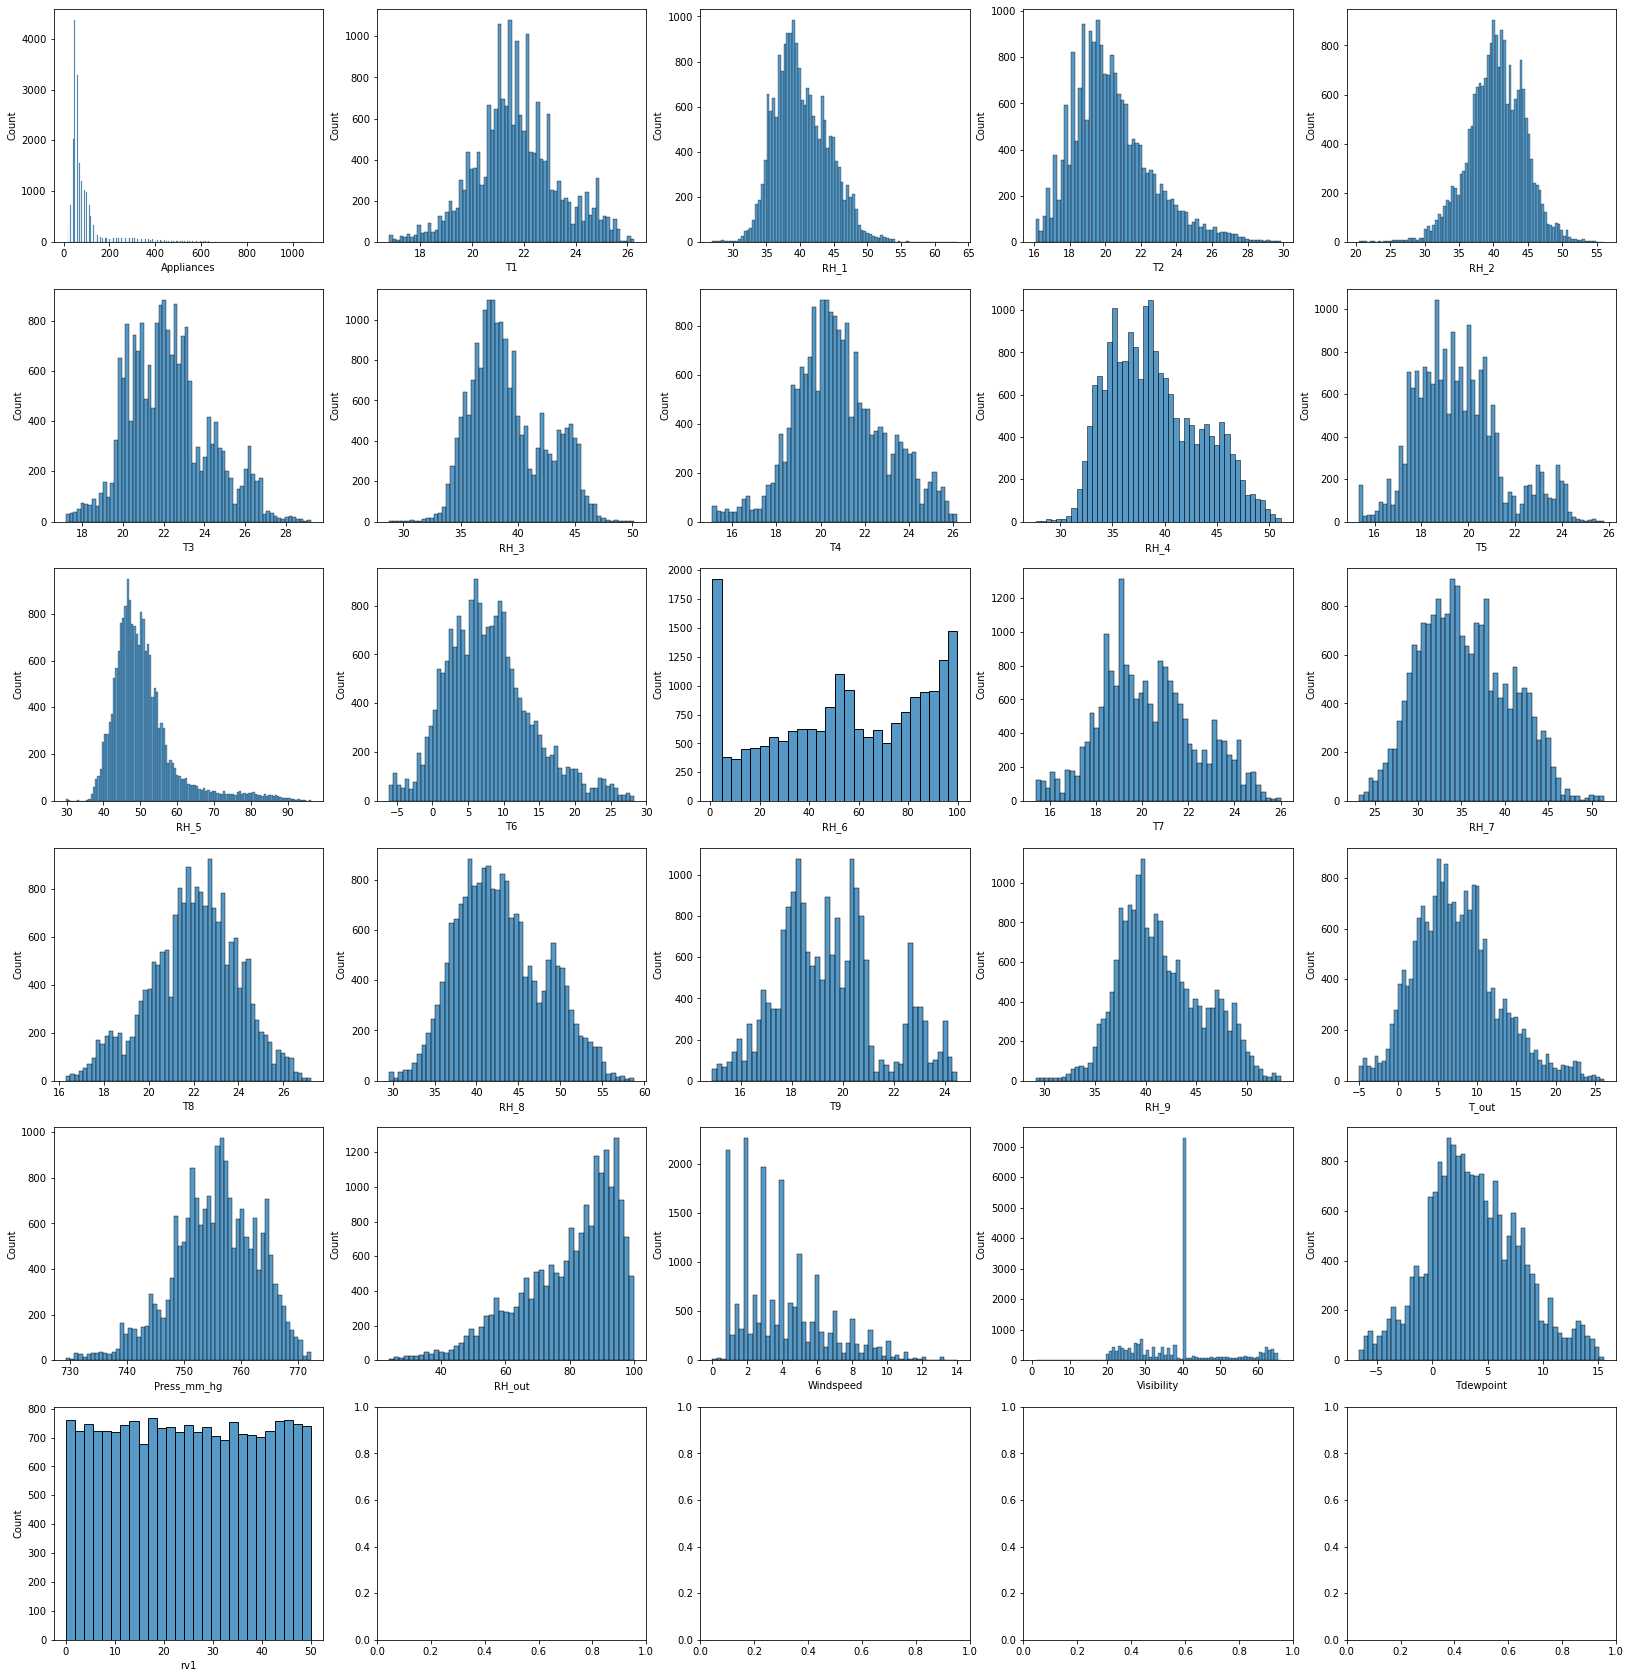

In [11]:
# Distribution plot for each features

ls = []
colName = [j for j in dataVisual.columns]
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.histplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k], data=dataVisual)

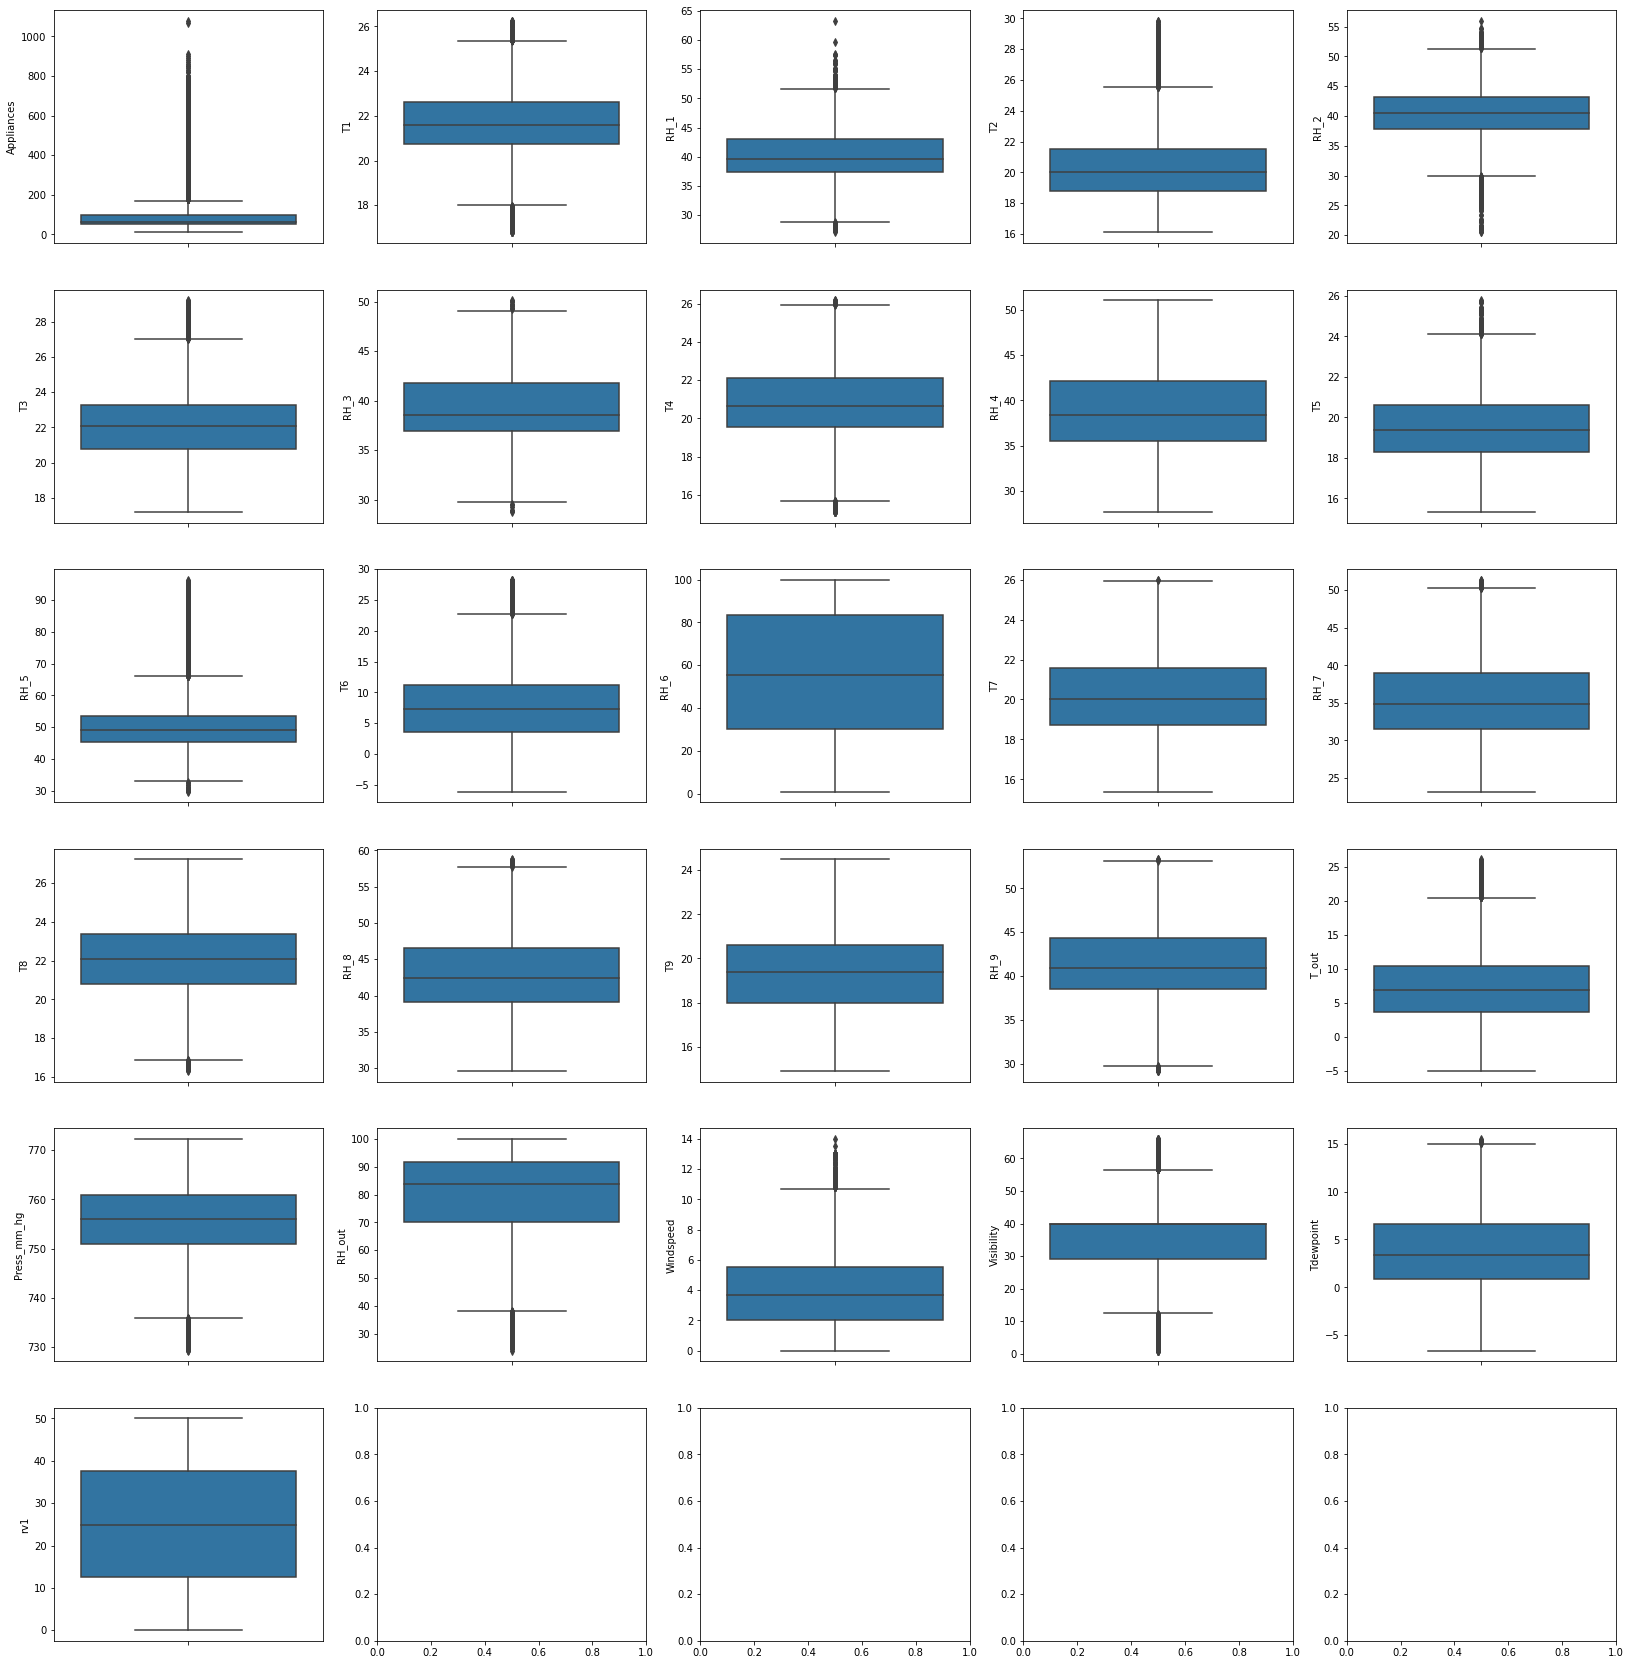

In [12]:
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.boxplot(ax=ax[ls[k][0], ls[k][1]], y=colName[k], data=dataVisual)

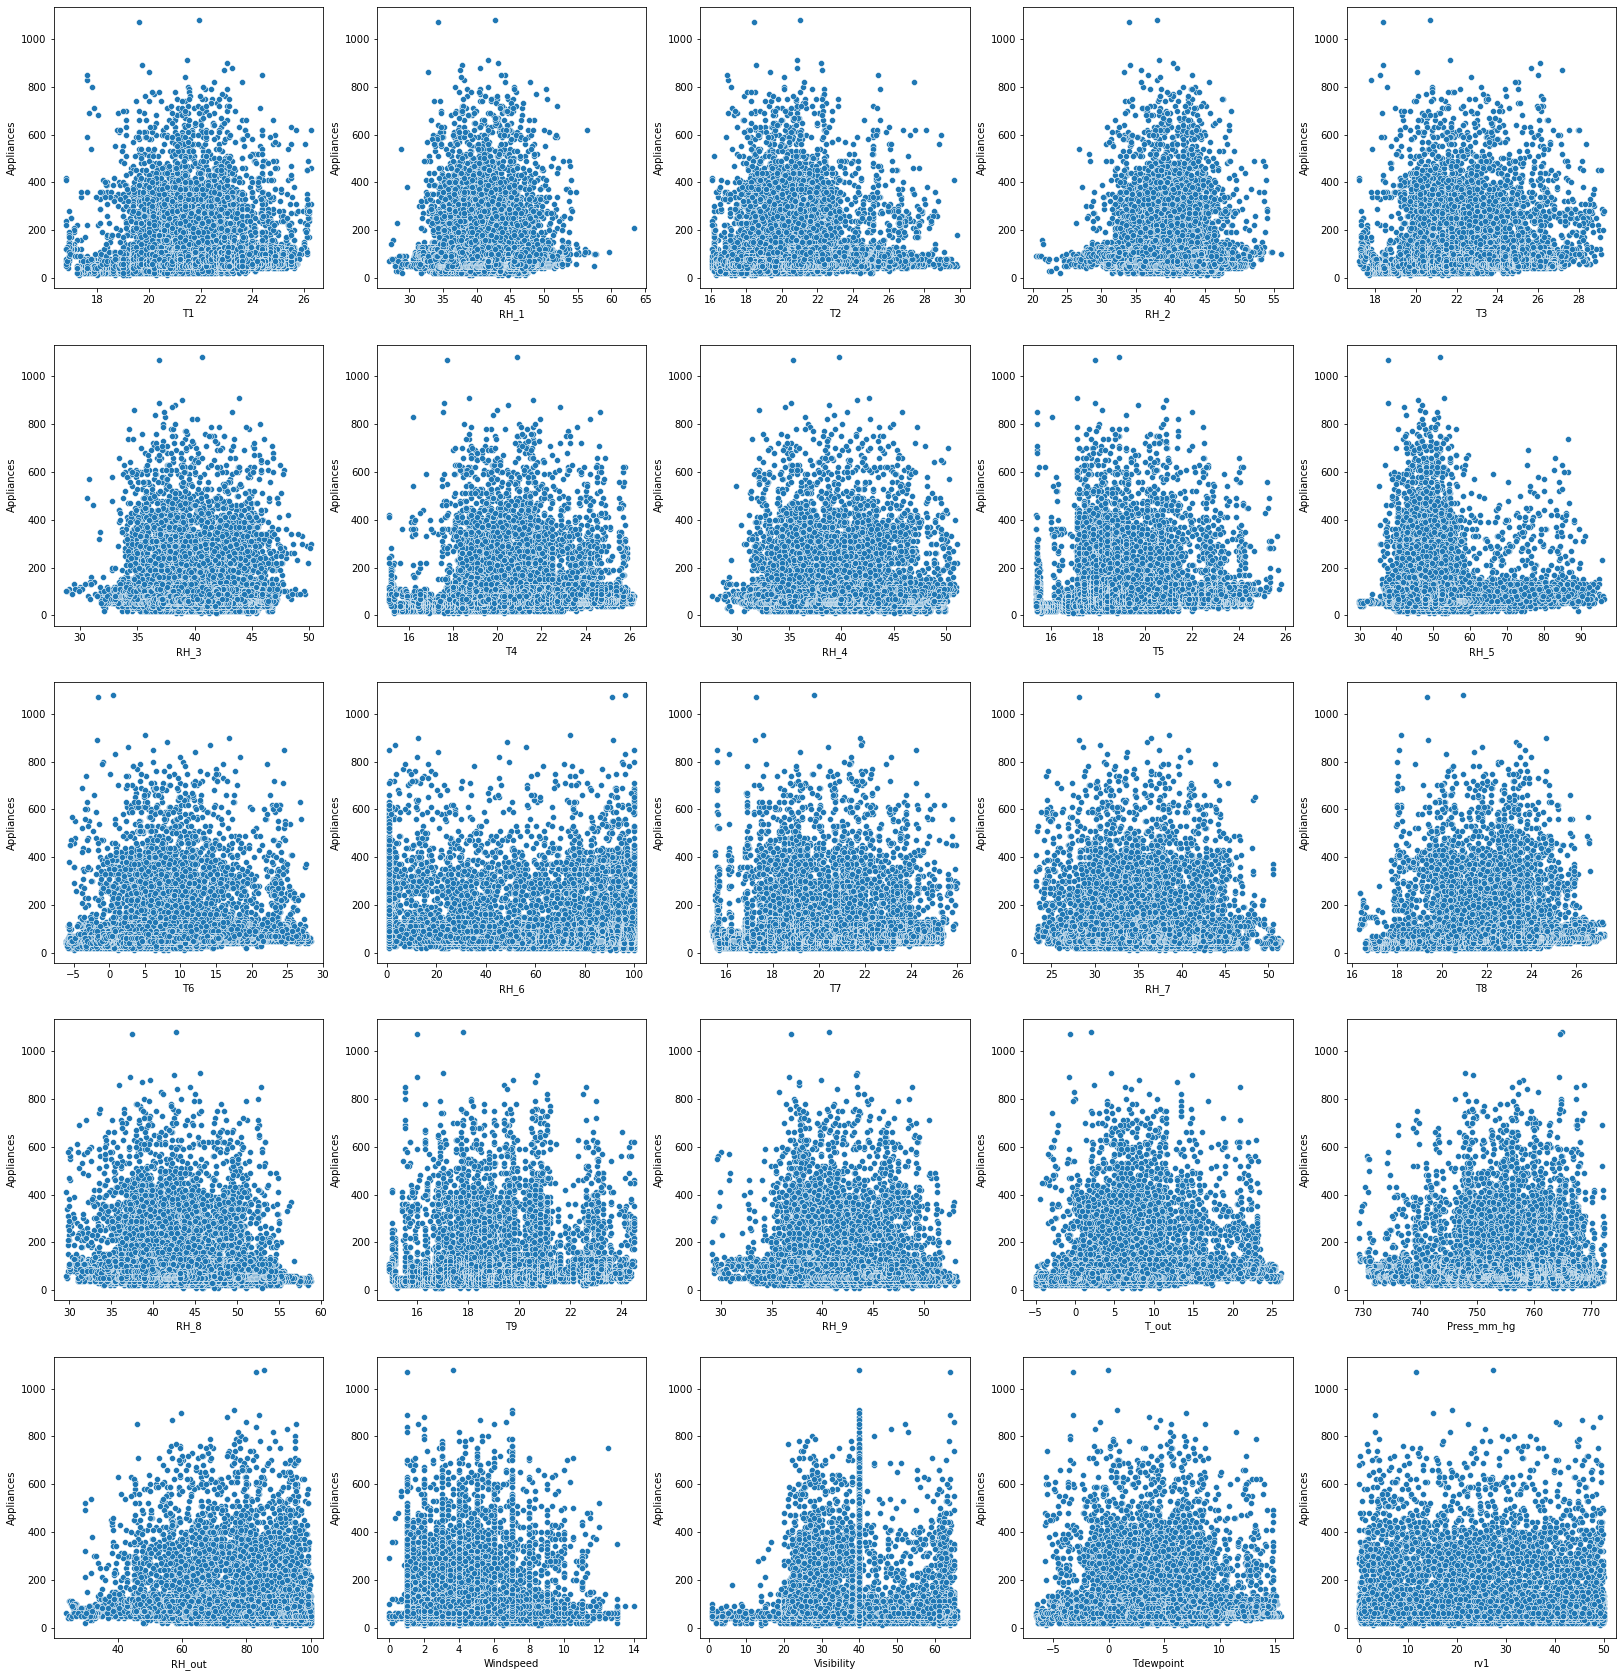

In [13]:
b = 0
while b < 7:
    for i in range(5):
        ls.append((b, i))
    b+=1
fig, ax = plt.subplots(5, 5, figsize=(28, 30))
for k in range(25):
    sns.scatterplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k+1], y=colName[0], data=dataVisual)

<AxesSubplot:>

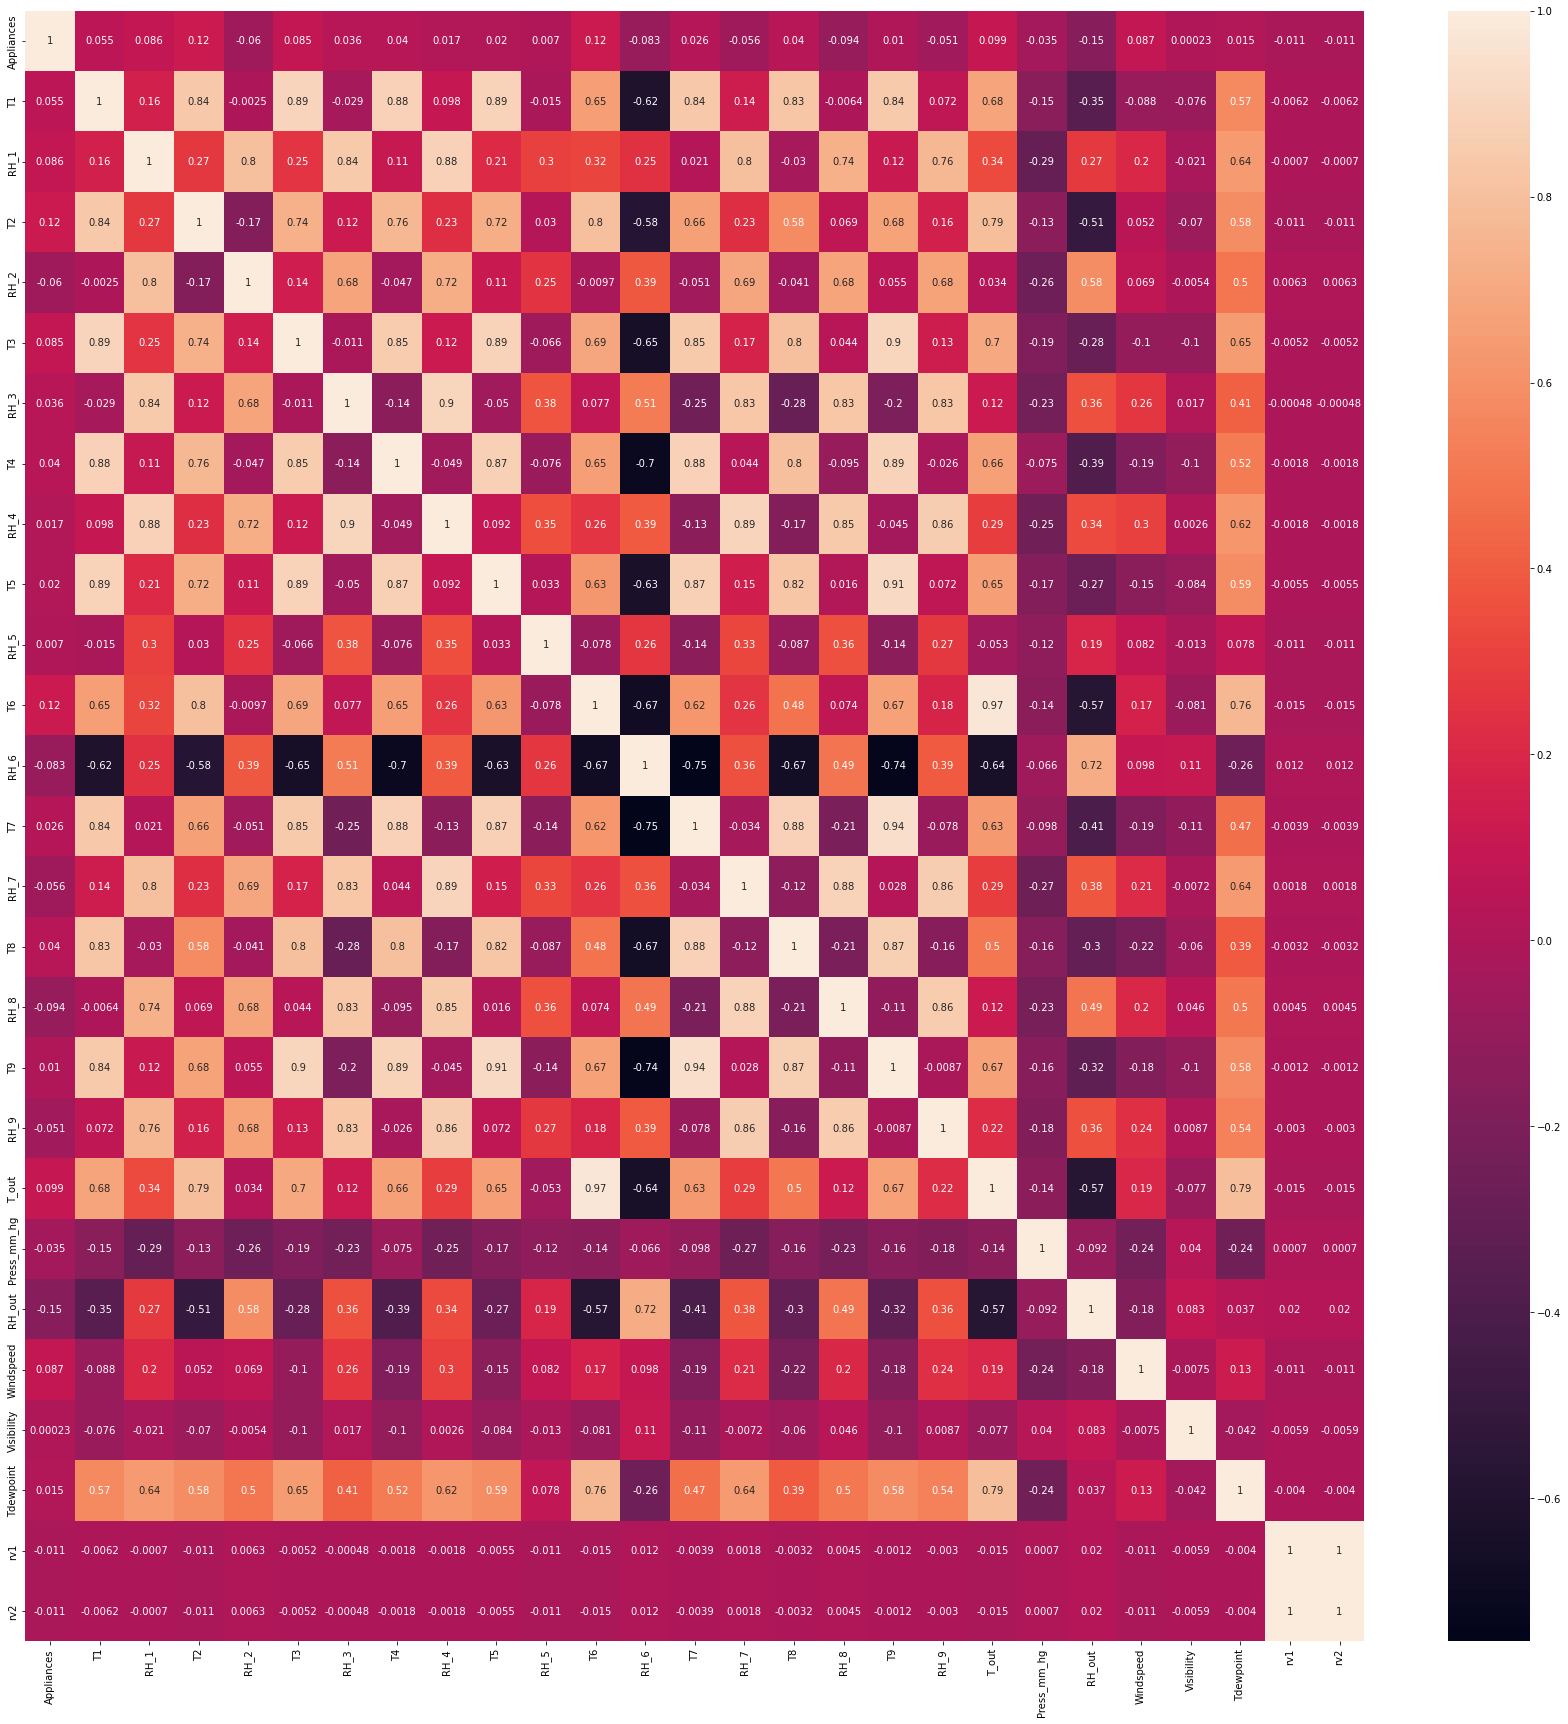

In [14]:
corr = dataVisual.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

Preprocessing Data Before the data were pushed to model, I do some preprocessing to avoid poor performance of the model. I do normalization to make distribution of the features become normal. Also, I try to remove outliers of the data. It is because for predictive model that I will use sensitive to outliers and it can make poor performance model. After removing outliers I have found many missing value of the features. I encouter it with filling missing value with imputation method. I use mean value of each feature to fill the missing value.

In [15]:
## Data Normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(dataVisual), columns=dataVisual.columns)
dataTrans.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369132,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365595,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357878,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [16]:
#eliminating outliers
Q1=dataTrans.quantile(0.25)
Q3 = dataTrans.quantile(0.75)
IQR = Q3-Q1

dataClean = dataTrans[~((dataTrans < (Q1-IQR * 1.5)) |(dataTrans > (Q3 + IQR*1.5)))]
dataClean.head()
dataClean.shape

(19735, 27)

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
dataImp = pd.DataFrame(imputer.fit_transform(dataClean), columns=dataClean.columns)
dataImp.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.615662,0.894737,0.500000,0.529569,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369132,0.615662,0.894737,0.476190,0.529569,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365595,0.615662,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.615662,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357878,0.615662,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [18]:
dataImp.isnull().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Features Selection Then I do feature selection to make sure I use only importance features for training the model and predicting the energy consumption with small error...

In [19]:
# Univariate Selection

dataTarget = dataImp['Appliances']
dataPred = dataImp.drop('Appliances', axis=1)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataPred, dataTarget, test_size=0.3, random_state=42)

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(score_func=f_regression, k=10)
fit = selector.fit(dataPred, dataTarget)
dfscores = pd.DataFrame(fit.scores_)
dfpred = pd.DataFrame(dataPred.columns)
featScore = pd.concat([dfpred, dfscores], axis=1)
featScore.columns = ['Feature', 'Score']
featScore.nlargest(10, 'Score')

,Feature,Score
2,T2,1478.324098
14,T8,1435.651527
20,RH_out,1195.591436
0,T1,1073.495270
11,RH_6,1037.428268
10,T6,884.603121
15,RH_8,856.944863
6,T4,782.462412
17,RH_9,734.715489
18,T_out,728.562614


Feature Importance

In [23]:
from sklearn.ensemble import ExtraTreesRegressor

<AxesSubplot:>

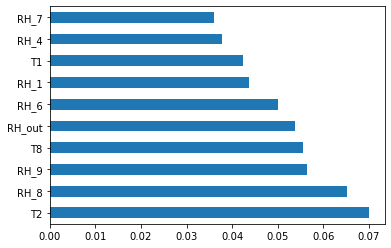

In [24]:
model = ExtraTreesRegressor()
model.fit(x_train, y_train)
feat_importance = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importance.nlargest(10).plot(kind='barh')

Data Splitting I am splitting data into two parts training and test data set for each variable. I do this with proportion 80 % of total data are training dataset and the rest are test dataset. Then I split the training dataset again in to two parts training and validation dataset. The second spltting I use proportion 80% of the training data are training data and the rest of data are validation dataset.

In [25]:
y = dataImp['Appliances']
X = dataImp[['T2', 'T6', 'T8', 'T1', 'T_out', 'T4','RH_9', 'RH_6', 'RH_8', 'RH_out', 'Windspeed']]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [27]:
xTrain, xVal, yTrain, yVal = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

Baseline Model For baseline model I am using Ridge regression and lasso regressor. For the ridge regression model I keep the parameter deafult. For the lasso regressor I vary the n_estimators parameter from 1 until 100. The metrics to evaluate each model performance is mean absolute error.

In [33]:
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [36]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(x_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

T2           0.006522
T6           0.003530
T8           0.004481
T1           0.004079
T_out        0.002921
T4           0.002281
RH_9        -0.004607
RH_6        -0.001425
RH_8        -0.004353
RH_out      -0.004148
Windspeed    0.002179
dtype: float64
0.0005747128943875248


In [50]:
def modelRidge(n, xTrain, yTrain, xVal, yVal):
    modelRidge = Ridge(n_estimators=n, criterion='mae')
    modelRidge.fit(xTrain, yTrain)
    predRidge = modelRidge.predict(xVal)
    maeRidge = mean_absolute_error(yVal, predRidge)
    return print('This is MAE score for Ridge2 Regressor model', n, 'estimators : ', round(maeRidge, 3))

In [49]:
n = [1, 5, 10, 20, 25, 50, 75, 100]

for i in n:
    modelRidge(i, xTrain, yTrain, xVal, yVal)

TypeError: __init__() got an unexpected keyword argument 'i_estimators'

In [51]:
modelFinal = Ridge(n_estimators=20, criterion='mae')
modelFinal.fit(x_train, y_train)
predFinal = modelFinal.predict(x_test)
maeFinal = mean_absolute_error(y_test, predFinal)
print('This is MAE score of final model :', round(maeFinal, 3))

TypeError: __init__() got an unexpected keyword argument 'n_estimators'